In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('Salary_Data_Cleaned.csv')

In [55]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn'],
      dtype='object')

In [56]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [57]:
pd.set_option('display.max_columns', None)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary,State,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,MD,0,39,1,0,0,0,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,FL,1,13,1,0,1,0,1
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,WA,1,58,1,0,0,0,0
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,NY,1,25,1,0,0,0,1


In [58]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

#job title and seniority

# Fix state Los Angeles

# JOb description in length

# Competitor count

# Hourly wage to annual



In [59]:
df['Job_simp'] = df['Job Title'].apply(title_simplifier)

In [60]:
df.Job_simp.value_counts()

Job_simp
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64

In [61]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

seniority
na        520
senior    220
jr          2
Name: count, dtype: int64

In [62]:
# Fix state los Angeles

df['job_state'] = df.State.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.State.value_counts()

State
 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: count, dtype: int64

In [63]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state'],
      dtype='object')

In [64]:
# job descrition length

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [65]:
df.desc_len

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

## - Competitor Count

In [66]:
# competitors count
df['Num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [67]:
df[['Competitors','Num_comp']]

,Competitors,Num_comp
0,-1,0
1,-1,0
2,-1,0
3,"Oak Ridge National Laboratory, National Renewa...",3
4,"Commerce Signals, Cardlytics, Yodlee",3
...,...,...
737,"Pfizer, AstraZeneca, Merck",3
738,"See Tickets, TicketWeb, Vendini",3
739,-1,0
740,-1,0


## - Hourly Wage to annual

In [68]:
# Hourly wage to annual
df['Min_Salary'] = df.apply(lambda x: x.Min_Salary*2 if x.PerHour==1 else x.Min_Salary, axis =1)
# Hourly wage to annual
df['Man_Salary'] = df.apply(lambda x: x.Max_Salary*2 if x.PerHour==1 else x.Max_Salary, axis =1)



In [69]:
df[df.PerHour ==1][['PerHour','Min_Salary','Max_Salary']]

,PerHour,Min_Salary,Max_Salary
165,1,34,24
177,1,42,34
197,1,36,25
202,1,42,34
210,1,30,25
246,1,34,24
271,1,42,34
337,1,36,25
345,1,48,39
357,1,42,34


In [70]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary,State,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn,Job_simp,seniority,job_state,desc_len,Num_comp,Man_Salary
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,NM,0,50,1,0,0,0,1,data scientist,na,NM,2536,0,91
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,MD,0,39,1,0,0,0,0,data scientist,na,MD,4783,0,112
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,FL,1,13,1,0,1,0,1,data scientist,na,FL,3461,0,90
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,WA,1,58,1,0,0,0,0,data scientist,na,WA,3883,3,97
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,NY,1,25,1,0,0,0,1,data scientist,na,NY,2728,3,143


<b>Now Everything is ready for EDA </b>

# Exploratory Data Analysis


In [71]:
df.describe()

,Salary Estimate,Rating,Founded,PerHour,Employee,Min_Salary,Max_Salary,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn,desc_len,Num_comp,Man_Salary
count,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,100.626011,3.618868,1837.154987,0.032345,0.0,74.719677,127.183288,0.557951,49.389488,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908,128.149596
std,38.855948,0.801210,497.183763,0.177034,0.0,30.980593,46.909006,0.496965,53.962906,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239,45.220324
min,13.500000,-1.000000,-1.000000,0.000000,0.0,15.000000,16.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,16.000000
25%,73.500000,3.300000,1939.000000,0.000000,0.0,52.000000,96.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000,96.000000
50%,97.500000,3.700000,1988.000000,0.000000,0.0,69.500000,124.000000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000,124.000000
75%,122.500000,4.000000,2007.000000,0.000000,0.0,91.000000,155.000000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000,155.000000
max,254.000000,5.000000,2019.000000,1.000000,0.0,202.000000,306.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000,306.000000


In [72]:
 df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

<Axes: >

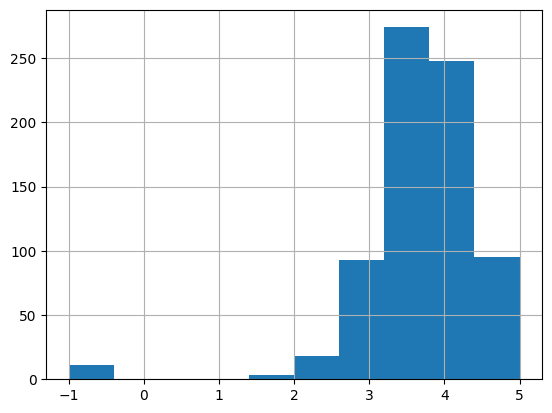

In [73]:
df.Rating.hist()

<Axes: >

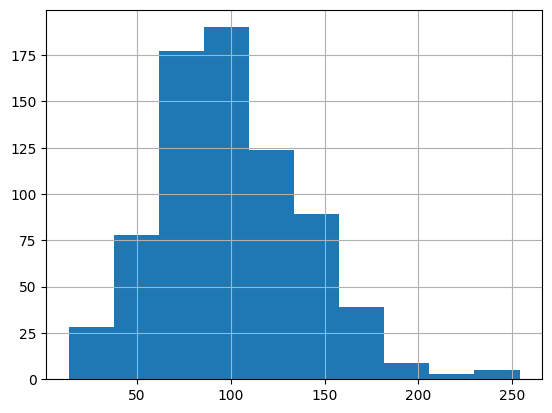

In [74]:
df['Salary Estimate'].hist()

<Axes: >

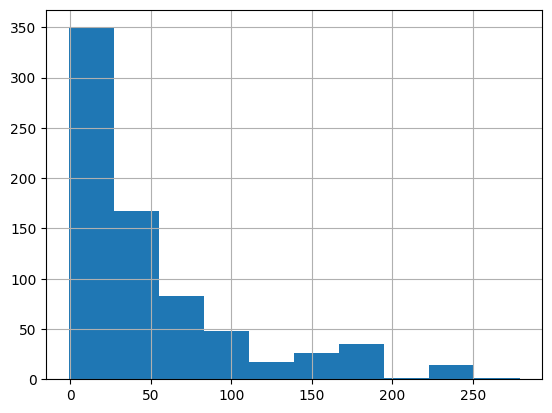

In [75]:
df.Age.hist()

<Axes: >

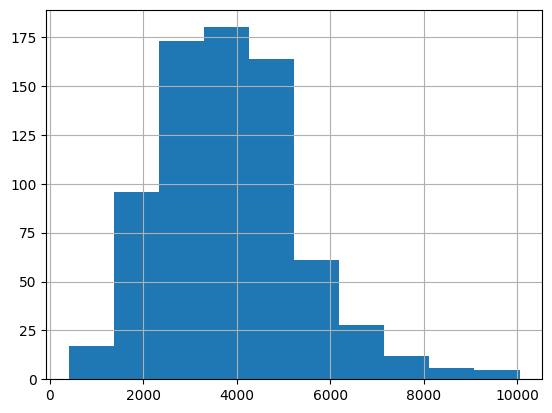

In [76]:
df.desc_len.hist()

## Checking Outliers by boxplot

<b>Columns:</b>

1. Salary Estimate.
2. Age.
3. desc_len.
4. Rating.

<Axes: >

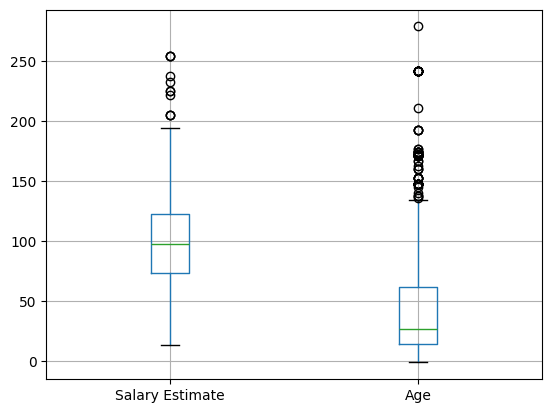

In [77]:
df.boxplot(column = ['Salary Estimate','Age'])

it 

<Axes: >

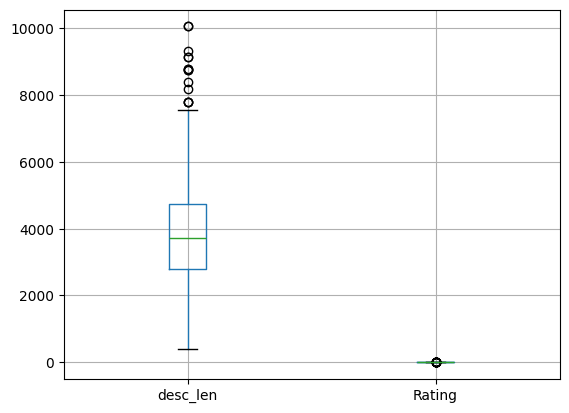

In [78]:
df.boxplot(column= ['desc_len','Rating'])

<Axes: >

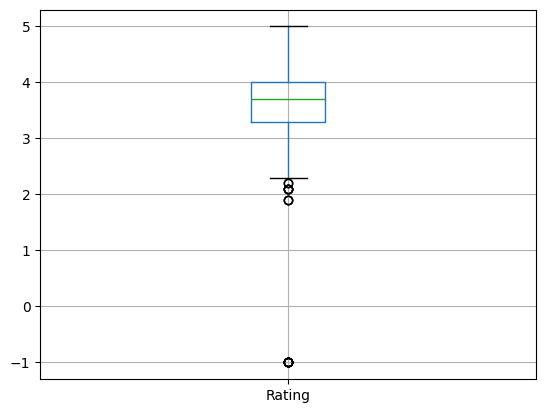

In [79]:
df.boxplot(column=['Rating'])

## Correlation between Variables


In [80]:
df[['Age','Salary Estimate', 'Rating', 'desc_len']].corr()

,Age,Salary Estimate,Rating,desc_len
Age,1.000000,0.019410,0.026164,0.164730
Salary Estimate,0.019410,1.000000,0.013492,0.078808
Rating,0.026164,0.013492,1.000000,-0.012281
desc_len,0.164730,0.078808,-0.012281,1.000000


<Axes: >

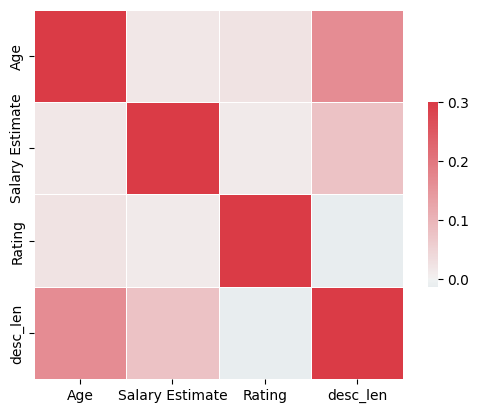

In [81]:
cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(df[['Age','Salary Estimate', 'Rating', 'desc_len']].corr(), vmax=.3, center=0, cmap=cmap,
           square=True, linewidths=0.5, cbar_kws = {'shrink': .5})

In [82]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

In [85]:
df_cat = df[['Location', 'Headquarters','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Company Name'
             ,'job_state', 'Same State','Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority']]

graph for Location: total = 200


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


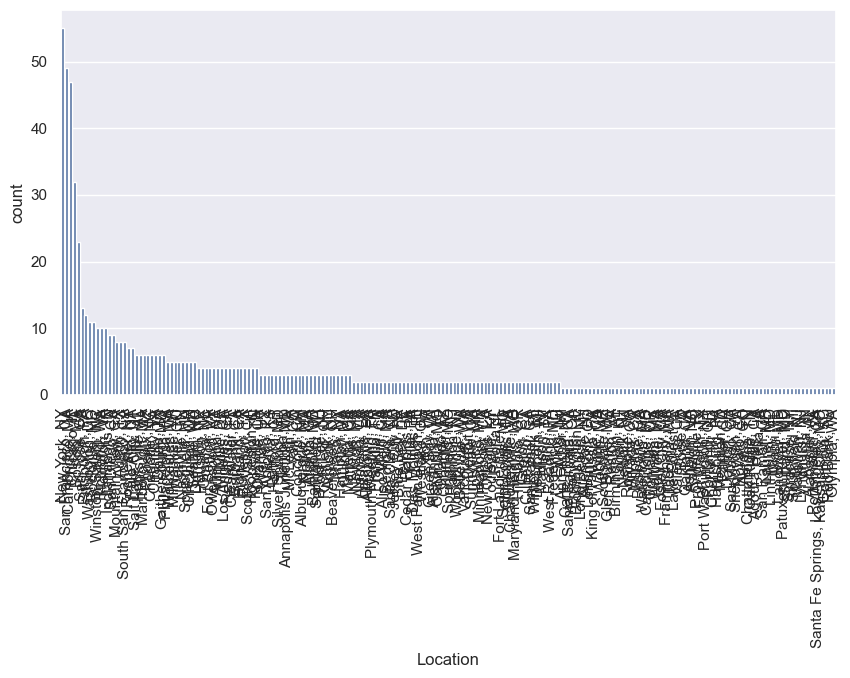

graph for Headquarters: total = 198


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


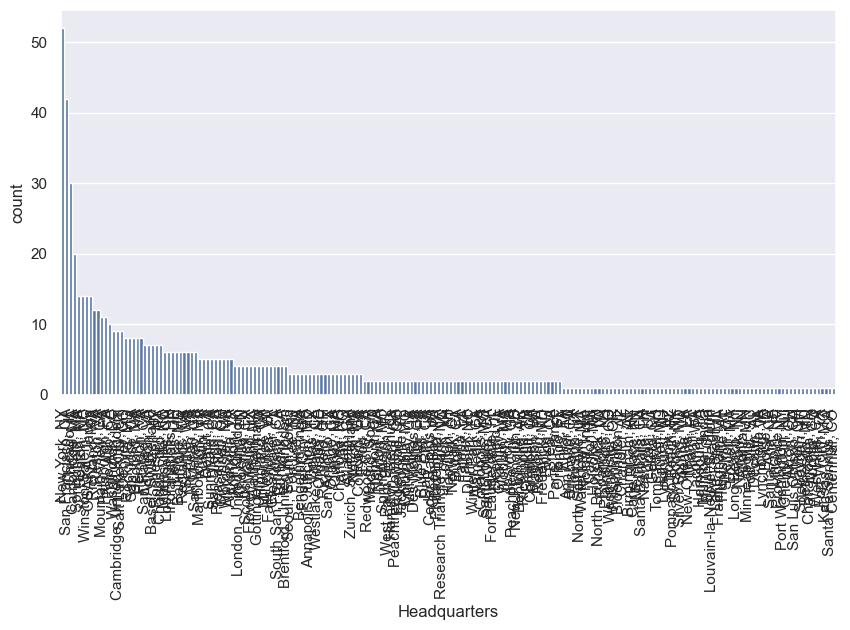

graph for Size: total = 9


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


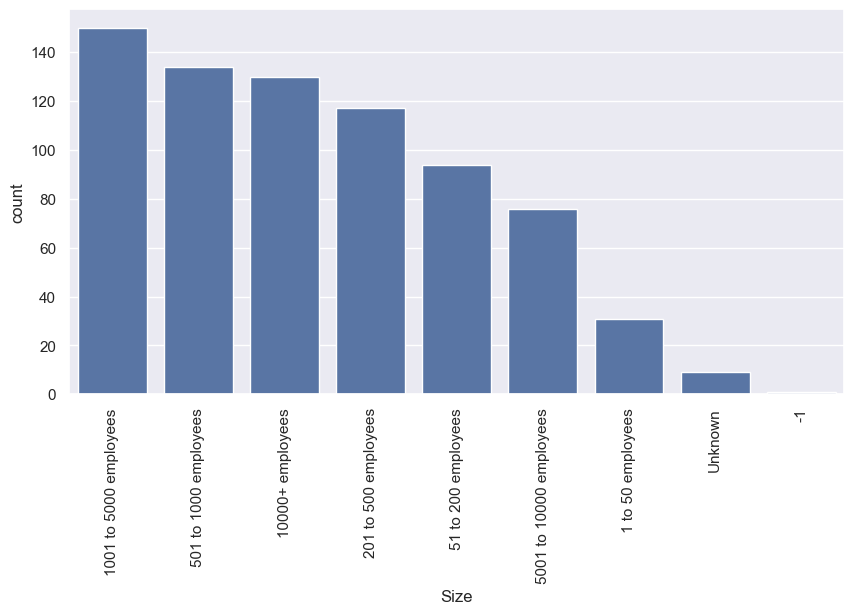

graph for Type of ownership: total = 11


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


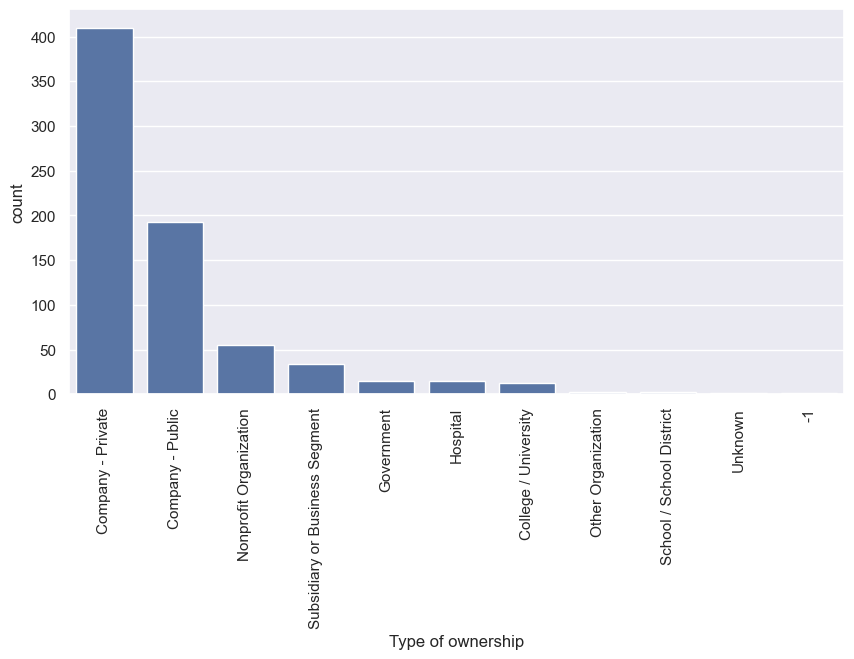

graph for Industry: total = 60


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


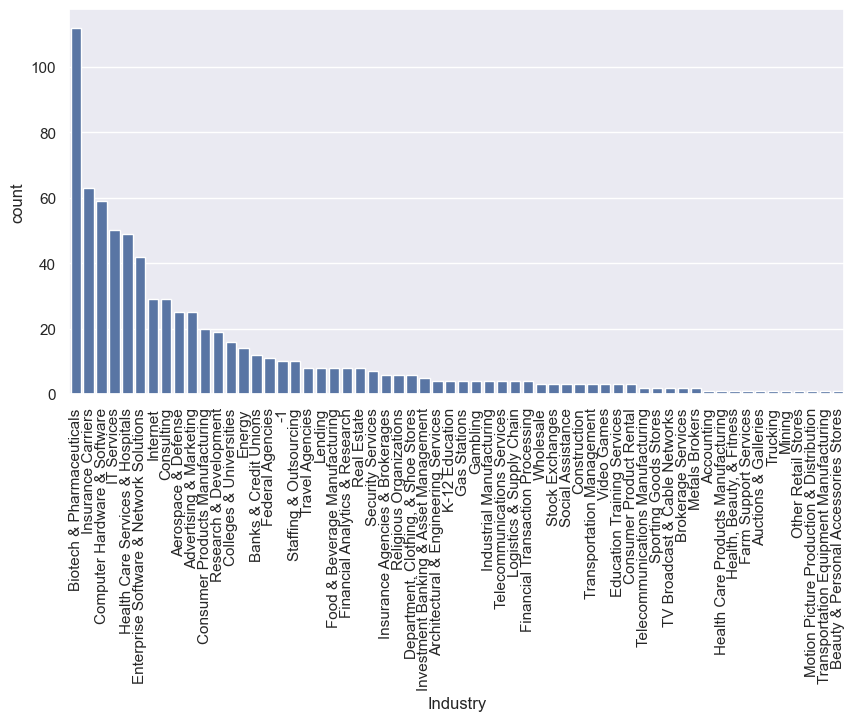

graph for Sector: total = 25


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


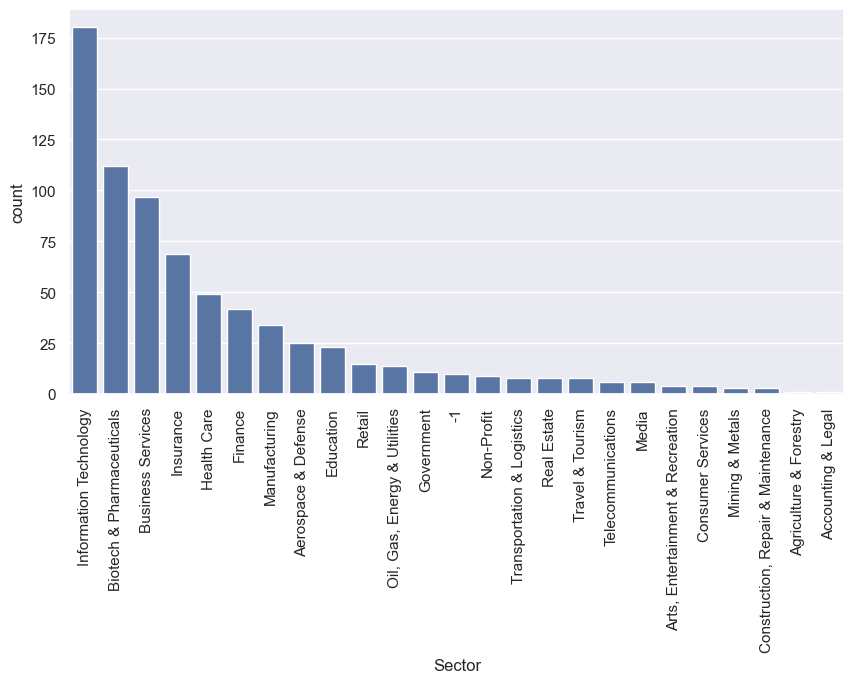

graph for Revenue: total = 14


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


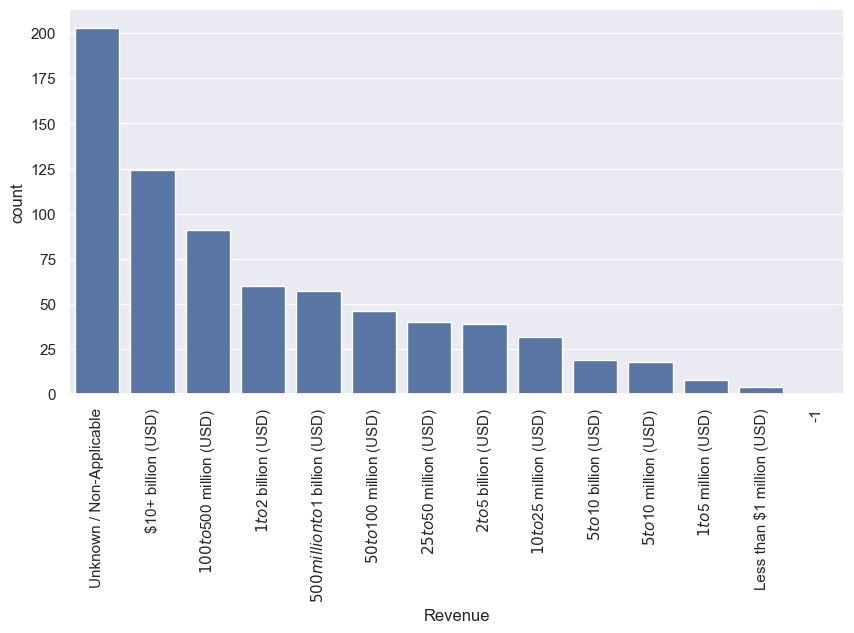

graph for Company Name: total = 343


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


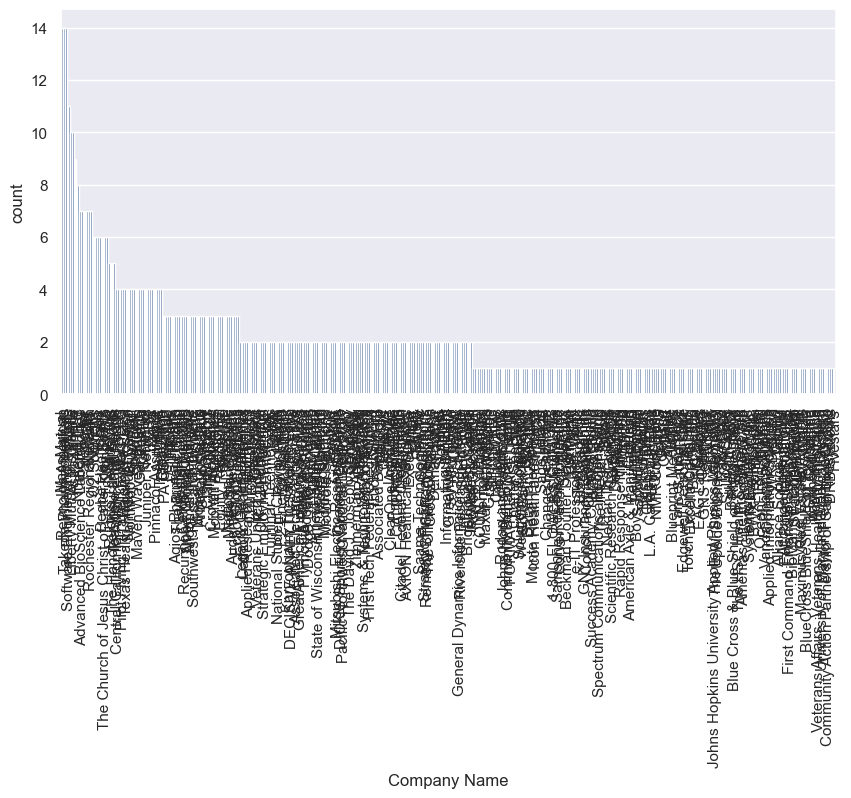

graph for job_state: total = 37


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


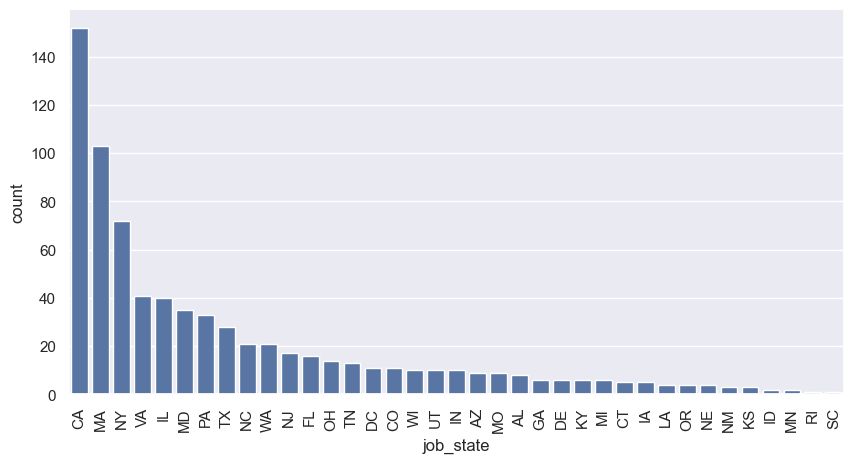

graph for Same State: total = 2


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


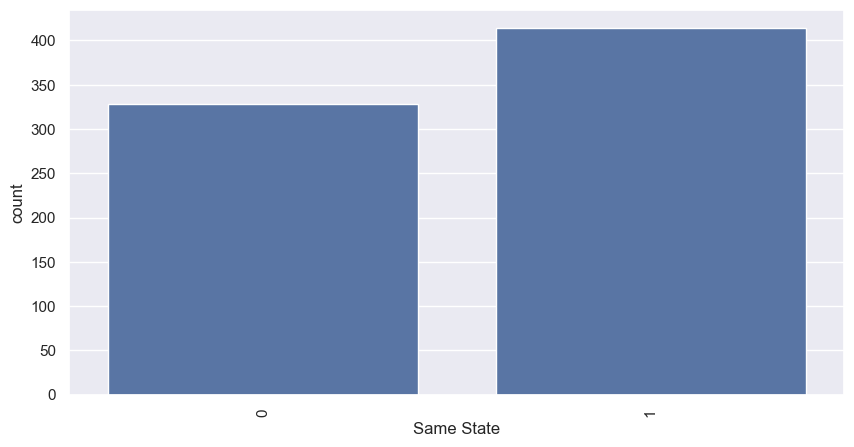

graph for Python_yn: total = 2


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


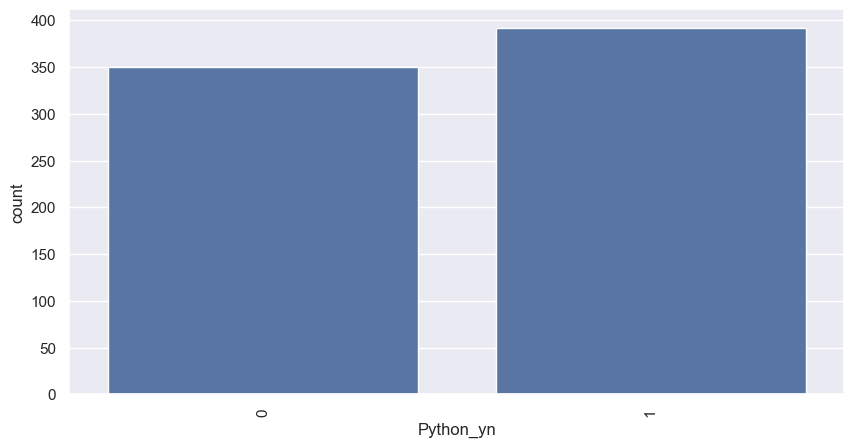

C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


graph for R Studio: total = 2


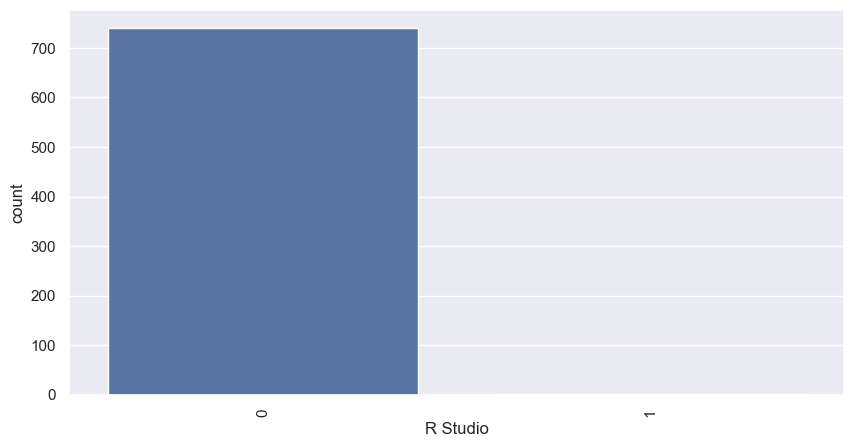

C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


graph for Spark: total = 2


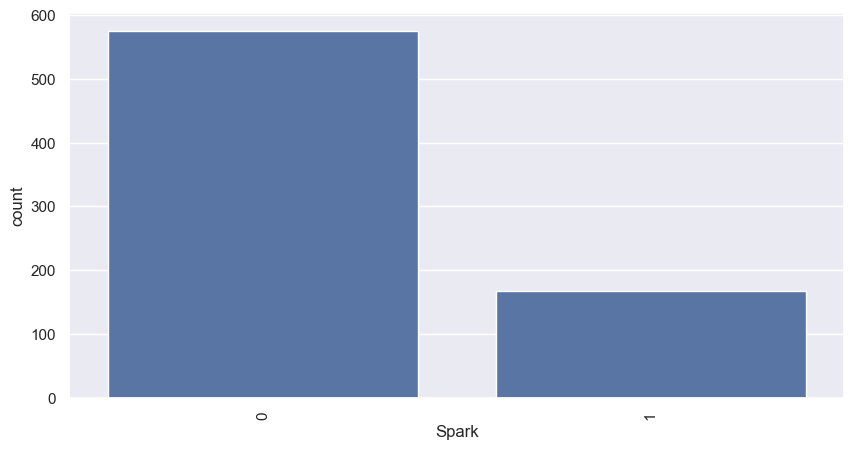

C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


graph for AWS_yn: total = 2


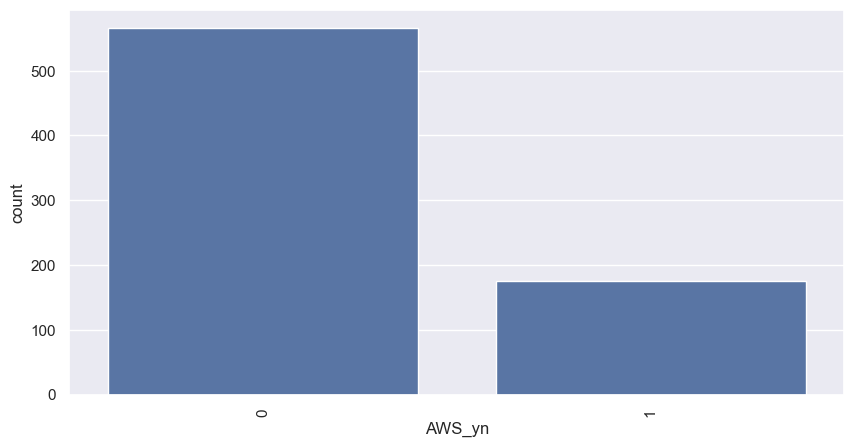

C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


graph for Excel_yn: total = 2


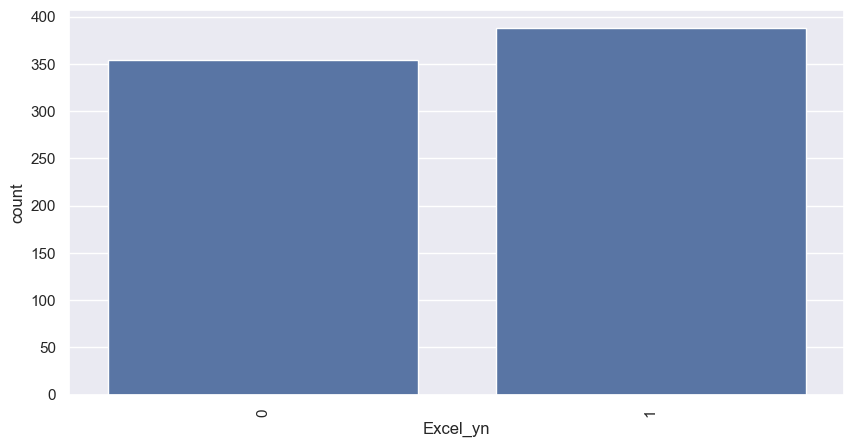

C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


graph for Job_simp: total = 7


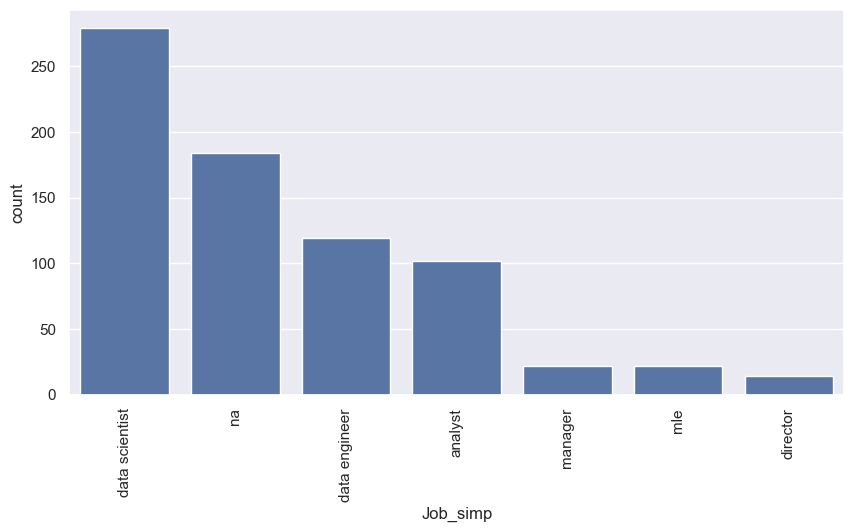

graph for seniority: total = 3


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\1684780267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


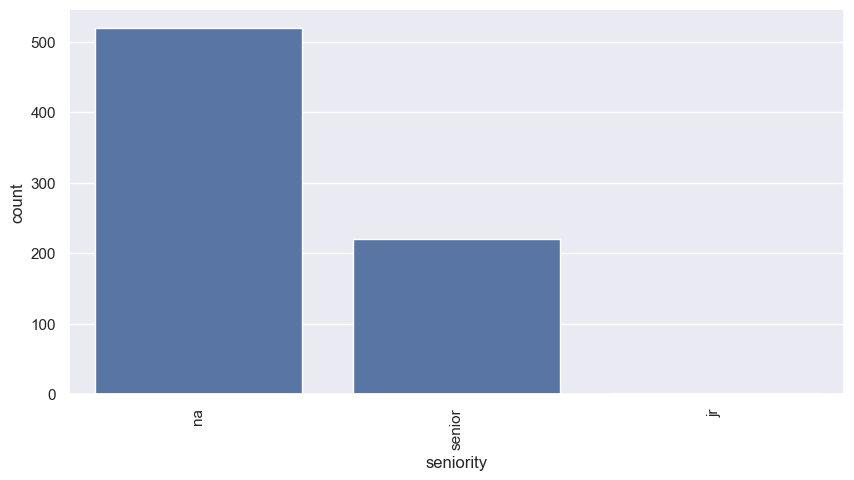

In [98]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    #sns.set(rc={'figure.figsize':(10, 5)})
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Clearing the Large plot

graph for Location: total = 20


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\2993430039.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


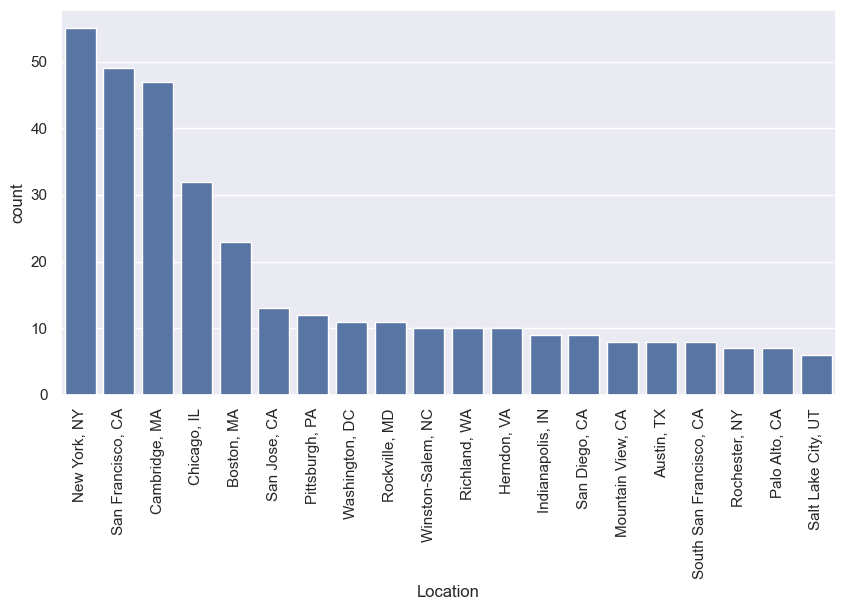

graph for Headquarters: total = 20


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\2993430039.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


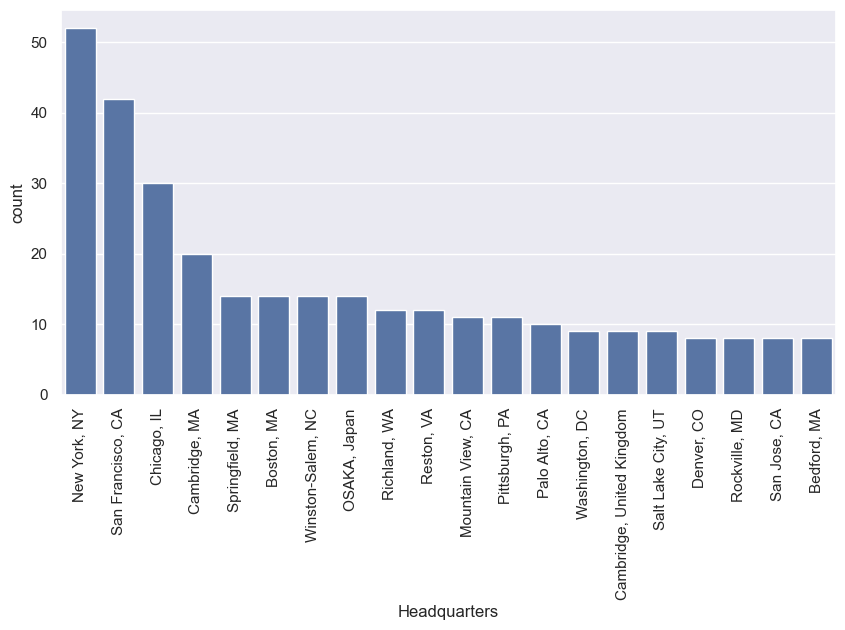

graph for Company Name: total = 20


C:\Users\Vampire\AppData\Local\Temp\ipykernel_4956\2993430039.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


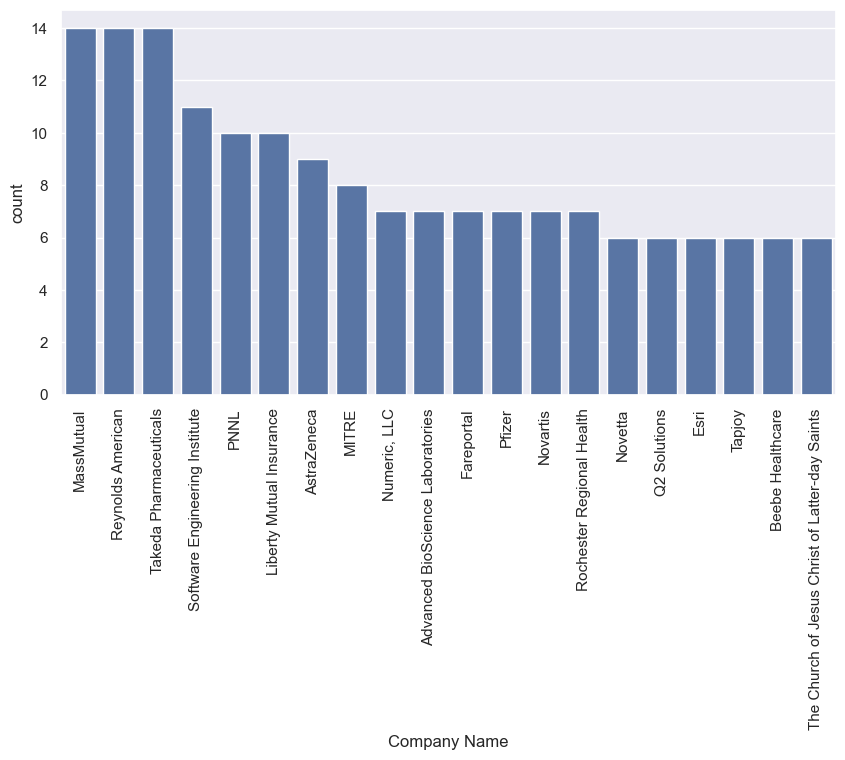

In [101]:
for i in df_cat[['Location','Headquarters','Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    #sns.set(rc={'figure.figsize':(10, 5)})
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [104]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

In [106]:
pd.pivot_table(df, index='Job_simp', values= 'Salary Estimate')

,Salary Estimate
Job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [107]:
pd.pivot_table(df, index=['Job_simp','seniority'], values= 'Salary Estimate')

Salary Estimate
Job_simp       seniority                 
analyst        jr               56.500000
               na               61.155405
               senior           79.092593
data engineer  na               96.701220
               senior          124.689189
data scientist jr              106.500000
               na              107.043011
               senior          138.956522
director       na              168.607143
manager        na               84.022727
mle            na              119.133333
               senior          142.071429
na             na               73.988189
               senior          109.061404

In [111]:
pd.pivot_table(df, index=['job_state','Job_simp'], values= 'Salary Estimate').sort_values('job_state', ascending=False)

Salary Estimate
job_state Job_simp                       
WI        na                    54.000000
          data scientist       113.500000
          analyst               58.833333
WA        na                    97.500000
          data scientist        99.764706
...                                   ...
AZ        analyst               55.000000
          na                   124.500000
AL        na                    43.750000
          data engineer         65.000000
          analyst               62.200000

[114 rows x 1 columns]